# Yammer

Yammer is a social network for communicating with coworkers. Individuals share documents,
updates, and ideas by posting them in groups. Yammer is free to use indefinitely, but
companies must pay license fees if they want access to administrative controls, including
integration with user management systems like ActiveDirectory. You sit in their centralized
Analytics team, which sits in the Engineering organization.
You show up to work Tuesday morning, September 2, 2014. The head of the Product team
walks over to your desk and asks you what you think about the latest activity on the user
engagement dashboards. You fire them up, and something immediately jumps out:


## The Problem
What caused the drop in user engagement? Based on what you observe in the data, what
recommendations would you make to the organization?



### The DATA
As below : 4 tables


In [1]:
import pandas as pd
import numpy as np

customer = pd.read_csv('yammer_users.csv')
customer.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [2]:
customer.shape

(19066, 6)

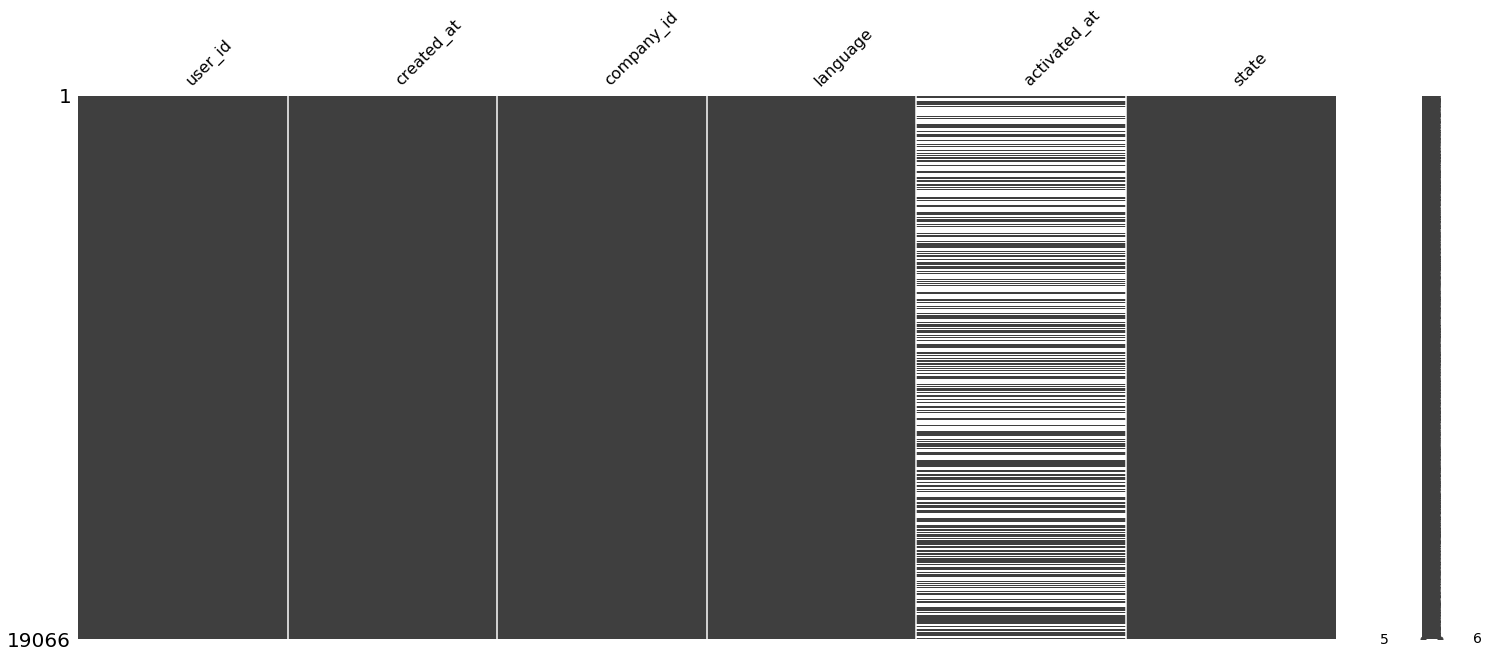

In [3]:
### check missing data in all tables
import missingno as msno

%matplotlib inline
msno.matrix(customer)

In [4]:
event_user = pd.read_csv('yammer_events_1.csv')
event_user.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


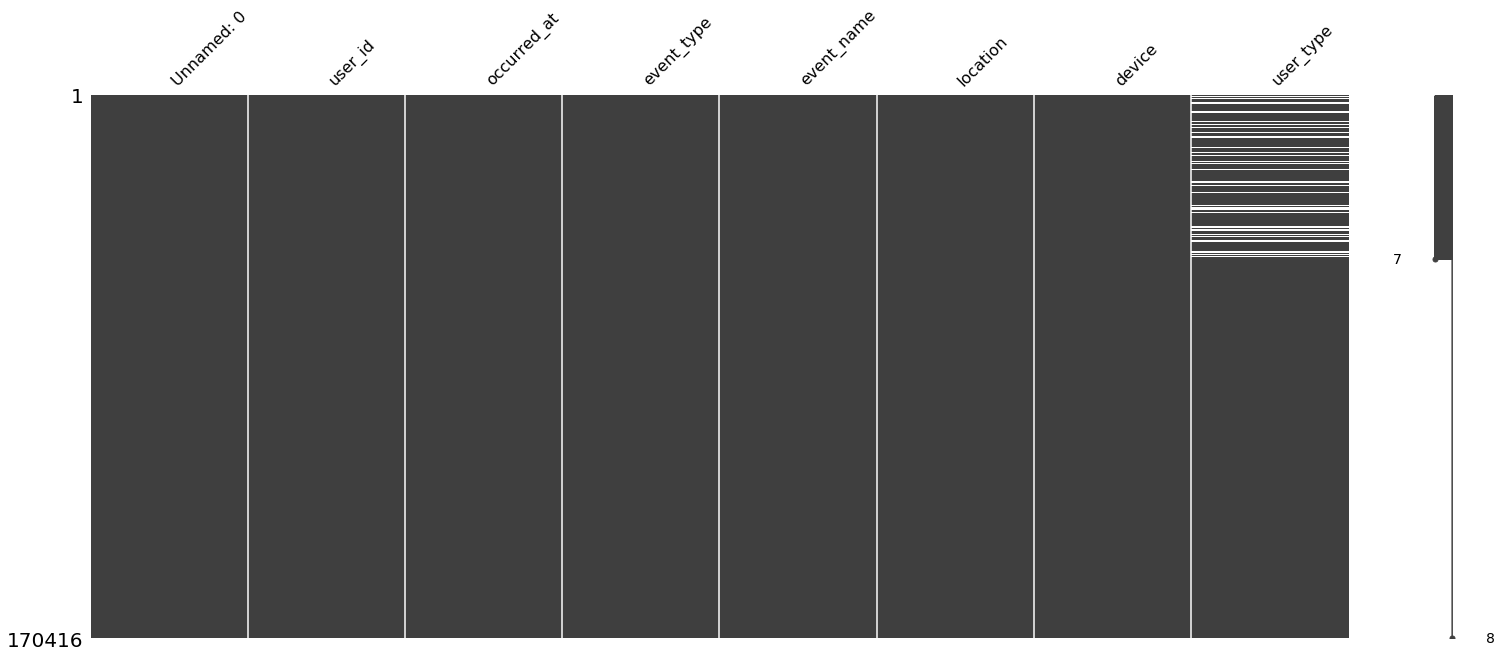

In [5]:
msno.matrix(event_user)

In [6]:
event_user2 = pd.read_csv('yammer_events_2.csv')
event_user2.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
0,170416,7754.0,2014-06-26 08:41:54,engagement,like_message,United States,amazon fire phone,1.0
1,170417,7754.0,2014-06-26 08:42:24,engagement,send_message,United States,amazon fire phone,1.0
2,170418,7754.0,2014-06-26 08:42:37,engagement,home_page,United States,amazon fire phone,1.0
3,170419,7754.0,2014-06-26 08:43:06,engagement,send_message,United States,amazon fire phone,1.0
4,170420,7754.0,2014-06-26 08:43:43,engagement,home_page,United States,amazon fire phone,1.0


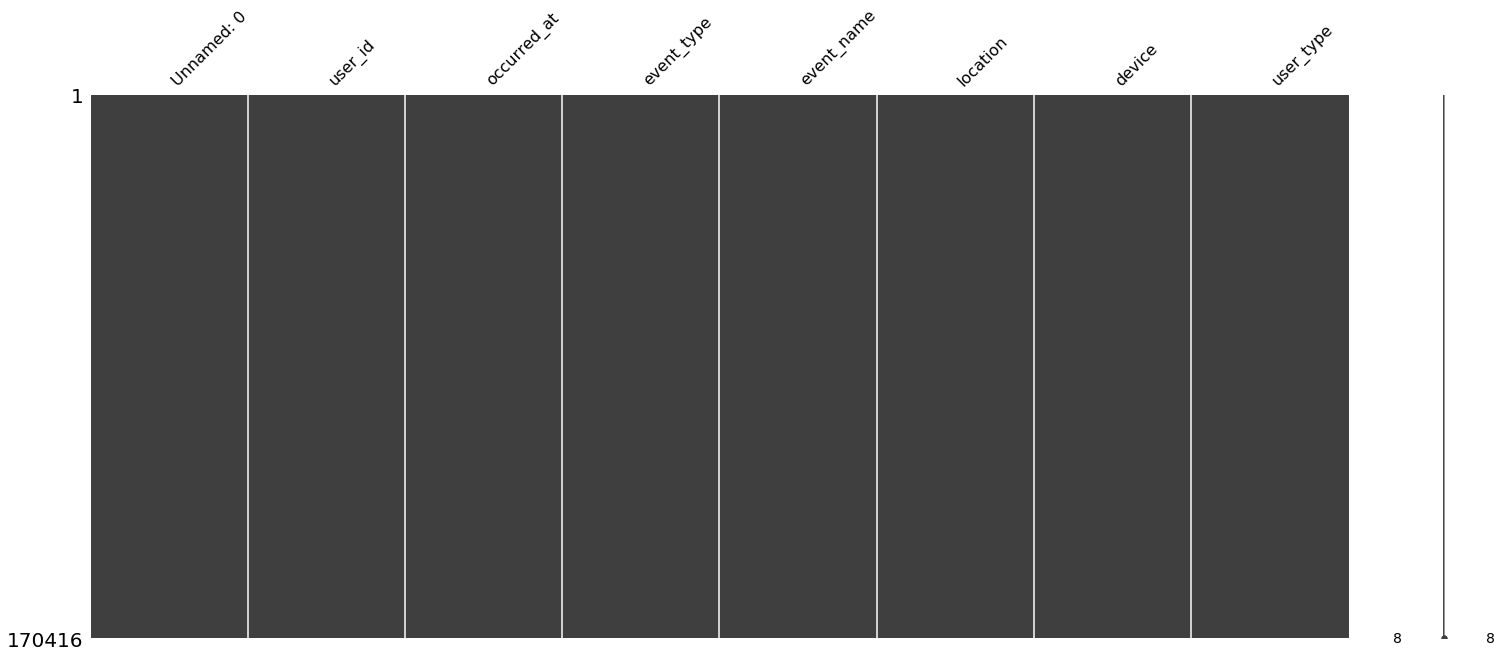

In [7]:
msno.matrix(event_user2)

In [8]:
email = pd.read_csv('yammer_emails.csv')
email.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


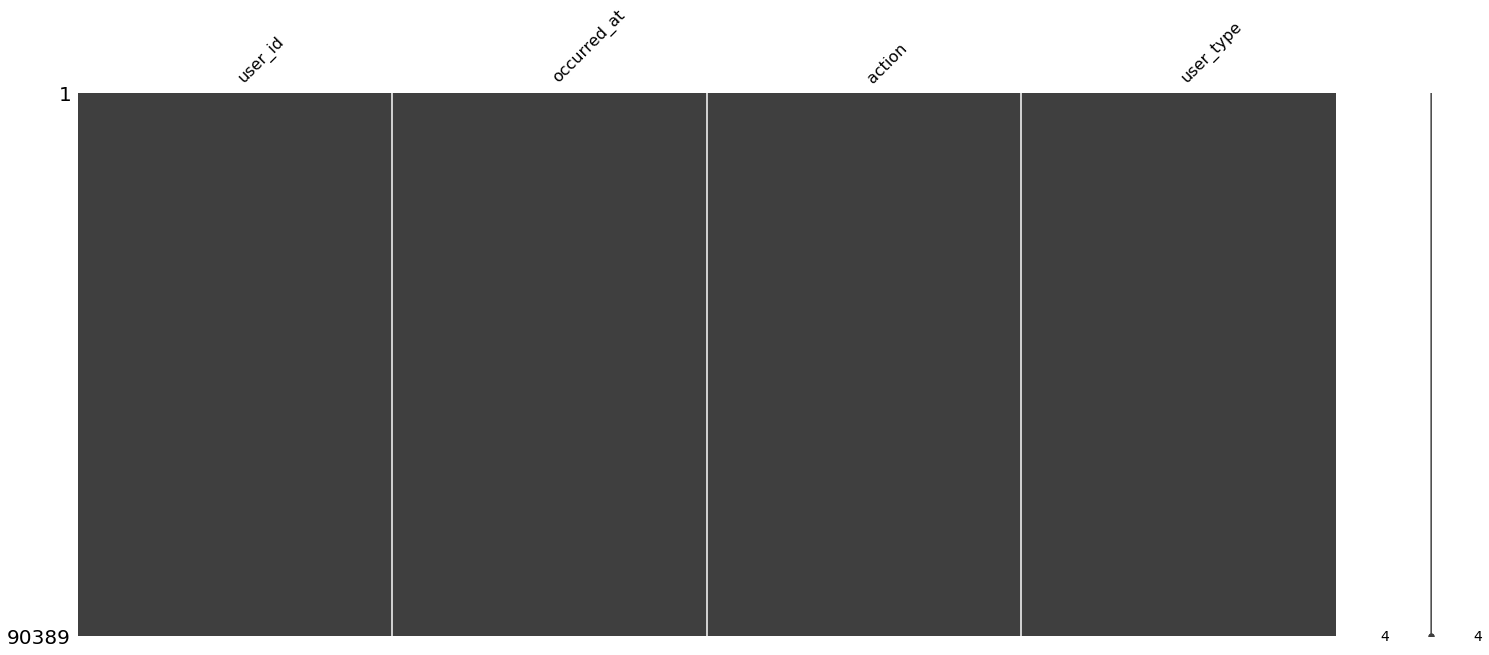

In [9]:
msno.matrix(email)

In [10]:
#quick data visual
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns


print("done")

done


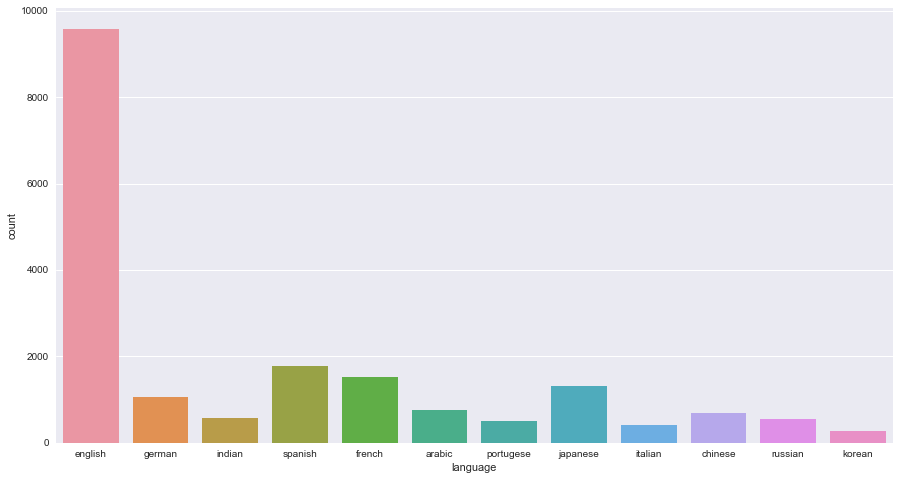

In [11]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x="language", data=customer)

In [13]:
customer['language'].value_counts()

english      9585
spanish      1771
french       1522
japanese     1324
german       1067
arabic        768
chinese       685
indian        583
russian       561
portugese     510
italian       420
korean        270
Name: language, dtype: int64

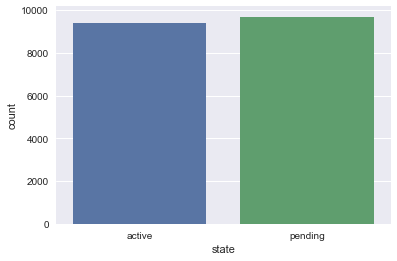

In [12]:
ax = sns.countplot(x="state", data=customer)

In [14]:
customer['state'].value_counts()

pending    9685
active     9381
Name: state, dtype: int64

In [23]:
# most active users
event_user['event_type'].value_counts()

engagement     151159
signup_flow     19257
Name: event_type, dtype: int64

In [24]:
# this table only has engagement
event_user2['event_type'].value_counts()

engagement    170416
Name: event_type, dtype: int64

In [20]:
#group data by week
event_user['timestamp'] = pd.to_datetime(event_user['occurred_at'], errors='coerce')
event_user.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type,timestamp
0,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02 11:02:39
1,1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02 11:02:53
2,2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02 11:03:28
3,3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02 11:04:09
4,4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02 11:03:16


In [21]:
eu1 = event_user.set_index('timestamp')
eu1.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
timestamp,,,,,,,,
2014-05-02 11:02:39,0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
2014-05-02 11:02:53,1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2014-05-02 11:03:28,2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
2014-05-02 11:04:09,3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
2014-05-02 11:03:16,4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


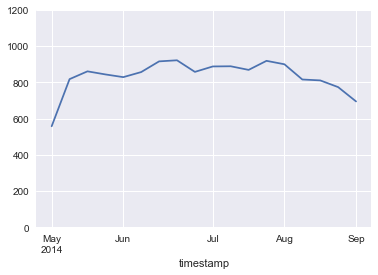

In [22]:
#individual user engagement
p1 = eu1.resample('W-MON')["user_id"].nunique()
p1.plot(ylim=[0,1200])

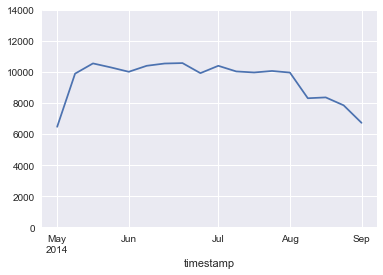

In [25]:
## all user activity
p2 = eu1.resample('W-MON')["user_id"].count()
p2.plot(ylim=[0,14000])

In [28]:
#group data by week
event_user2['timestamp'] = pd.to_datetime(event_user2['occurred_at'], errors='coerce')
event_user2.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type,timestamp
0,170416,7754.0,2014-06-26 08:41:54,engagement,like_message,United States,amazon fire phone,1.0,2014-06-26 08:41:54
1,170417,7754.0,2014-06-26 08:42:24,engagement,send_message,United States,amazon fire phone,1.0,2014-06-26 08:42:24
2,170418,7754.0,2014-06-26 08:42:37,engagement,home_page,United States,amazon fire phone,1.0,2014-06-26 08:42:37
3,170419,7754.0,2014-06-26 08:43:06,engagement,send_message,United States,amazon fire phone,1.0,2014-06-26 08:43:06
4,170420,7754.0,2014-06-26 08:43:43,engagement,home_page,United States,amazon fire phone,1.0,2014-06-26 08:43:43


In [29]:
eu2 = event_user2.set_index('timestamp')
eu2.head()

,Unnamed: 0,user_id,occurred_at,event_type,event_name,location,device,user_type
timestamp,,,,,,,,
2014-06-26 08:41:54,170416,7754.0,2014-06-26 08:41:54,engagement,like_message,United States,amazon fire phone,1.0
2014-06-26 08:42:24,170417,7754.0,2014-06-26 08:42:24,engagement,send_message,United States,amazon fire phone,1.0
2014-06-26 08:42:37,170418,7754.0,2014-06-26 08:42:37,engagement,home_page,United States,amazon fire phone,1.0
2014-06-26 08:43:06,170419,7754.0,2014-06-26 08:43:06,engagement,send_message,United States,amazon fire phone,1.0
2014-06-26 08:43:43,170420,7754.0,2014-06-26 08:43:43,engagement,home_page,United States,amazon fire phone,1.0


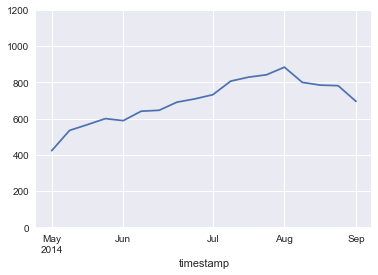

In [30]:
#individual user engagement
p1 = eu2.resample('W-MON')["user_id"].nunique()
p1.plot(ylim=[0,1200])

In [26]:
# count events
event_user['event_name'].value_counts()

home_page                 44534
like_message              28192
view_inbox                26477
login                     17715
send_message              15734
search_autocomplete        8067
create_user                7298
search_run                 5992
enter_email                4407
enter_info                 3872
complete_signup            3680
search_click_result_2       688
search_click_result_1       640
search_click_result_4       573
search_click_result_3       500
search_click_result_5       440
search_click_result_6       364
search_click_result_9       363
search_click_result_7       334
search_click_result_8       309
search_click_result_10      237
Name: event_name, dtype: int64

In [27]:
# count events
event_user2['event_name'].value_counts()

home_page                 49531
like_message              31056
view_inbox                29459
login                     20895
send_message              17371
search_autocomplete        9753
search_run                 7027
search_click_result_2       811
search_click_result_1       773
search_click_result_4       691
search_click_result_3       634
search_click_result_5       528
search_click_result_6       441
search_click_result_9       421
search_click_result_8       381
search_click_result_7       375
search_click_result_10      269
Name: event_name, dtype: int64

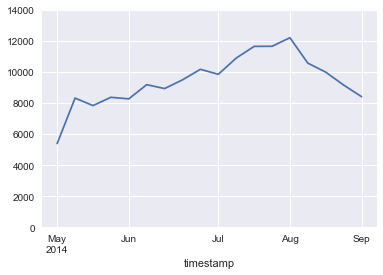

In [31]:
## all user activity
p2 = eu2.resample('W-MON')["user_id"].count()
p2.plot(ylim=[0,14000])